# 4o Lab de PSD (notebook para preencher com os resultados)

### Número do Grupo : `Grupo 8`

In [ ]:
#
# Primeiro vamos importar as bibliotecas necessárias
#
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve, correlate

## Definição do par de transformadas DFT - (direta e inversa)   

O par de transformadas discretas de Fourier (Discrete Fourier Transform - DFT) para um sinal de tempo discreto $x[k]$ com índice das amostras igual $k$ e o correspondente espectro de Fourier $X[\mu]$ com índice de frequências $\mu$ é calculado como  
\begin{align}
\text{DFT}: Y[\mu]=&\sum_{k=0}^{N-1}x[k]\cdot\mathrm{e}^{-\mathrm{j}\frac{2\pi}{N}k\mu}\\
\text{IDFT}: x[k]=\frac{1}{N}&\sum_{\mu=0}^{N-1}Y[\mu]\cdot\mathrm{e}^{+\mathrm{j}\frac{2\pi}{N}k\mu}
\end{align}

Observe o sinal negativo na função exponential da transformada direta (DFT) e o fator de normalização $1/N$ na transformada inversa (IDFT). Essa convensão é usada pela maioria dos livros textos de DSP e também pela biblioteca Python `numpy.fft.fft()`, `numpy.fft.ifft()` e funções do Matlab `fft()`, `ifft()`.

# PROBLEMA 1

## DFT e IDFT com "loops for"

Agora vamos implementar a DFT e a IDFT usando "loops for". Embora isso possa ser útil para entender e validar algoritmos em sua fase inicial de desenvolvimento, isso deve ser evitado para um código usado na prática: "loops for" normalmente são lentos e muitas vezes mais complicados de ler do que implementações usando matrizes e vetores. Especialmente para $N$ muito grandes, o tempo de computação é muito longo.

De qualquer forma, o conceito de "loop for" é: a DFT pode ser implementada com um "loop for" externo iterando sobre $\mu$ e um "loop for" interno somando todos os $k$ para um $\mu$ específico.

Usamos variável com subscrito _ aqui, a fim de salvar bons nomes de variáveis para o cálculo baseado em matriz.

## Parte A 

Escreva as funções DFT e IDFT que calculam, respectivamente, as transformadas discretas de Fourier direta e inversa. 

In [ ]:
#
# Função para calcular a DFT (com loops for) de um sinal de valor complexo (dtype=complex)
#
# Entrada: x -> vetor contendo as amostras (números complexos) do sinal no tempo 
# Saída: Y -> vetor contendo os coeficientes espectrais (números complexos) - (dtype=complex)
#
def DFT_1D(x):
    Y = np.zeros(len(x), dtype=complex)
    
    for mi in range(len(x)):
        for ka in range(len(x)):
            Y[mi] += x[ka]*np.exp(complex(0,-1)*2*np.pi/len(x)*ka*mi)
    return Y

In [ ]:
#
# Função para calcular a IDFT (com loops for) de um sinal de valor complexo (dtype=complex)
#
# Entrada: Y -> vetor contendo os coeficientes espectrais (números complexos) 
# Saída: x -> vetor contendo as amostras (números complexos) do sinal no tempo 
#
def IDFT_1D(Y):
    x = np.zeros(len(Y), dtype=complex)
    
    for ka in range(len(Y)):
        for mi in range(len(Y)):
            x[ka] += Y[mi]*np.exp(complex(0,1)*2*np.pi/len(Y)*ka*mi)
        x[ka] = x[ka]/len(Y)
    return x    

## Parte B 

Estude o código abaixo que cria uma sinal discreto composto pela soma de três ondas senoides com amplitude e frequências distintas. 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


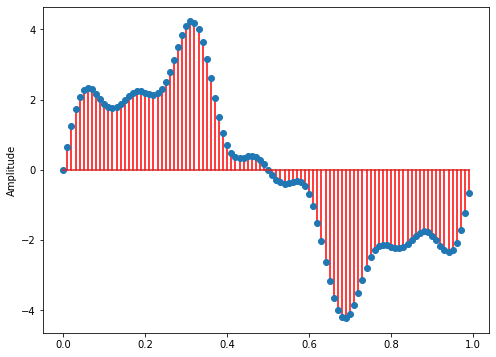

In [ ]:
# taxa de amostragem (sampling rate)
sr = 100

# intervalo de amostragem
ts = 1.0/sr
t = np.arange(0,1,ts)

freq = 1.
x = 3*np.sin(2*np.pi*freq*t)

freq = 4
x += np.sin(2*np.pi*freq*t)

freq = 7   
x += 0.5*np.sin(2*np.pi*freq*t)

plt.figure(figsize = (8, 6))
plt.stem(t, x, linefmt='red')
plt.ylabel('Amplitude')

plt.show()

## Parte C 

Escreva um código que utilize a função DFT criada anteriormente para calcular e plotar o espectro de frequências (abs(Y)) do sinal $x$ criado acima. 

**OBS**: Observe que a DFT codificada recebe como entrada um sinal complexo e o sinal acima é do tipo real. Portanto, transforme o sinal $x$ em uma sequência complexa com a parte imaginária igual a zero. 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


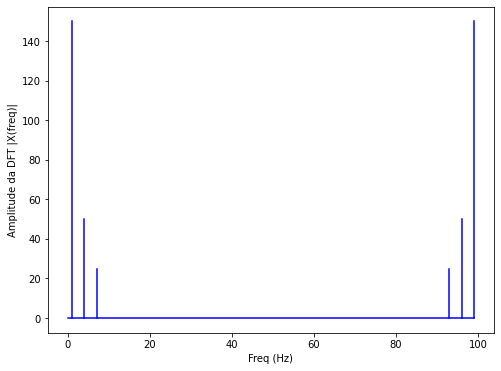

In [ ]:
# tamanho do vetor
N = len(x)

# cria um vetor de números complexos
x = x.astype(dtype=complex)

# chamada à função DFT
#print(np.fft.fft(x) == DFT_1D(x))
Y = DFT_1D(x)

# calcula a frequência
n = np.arange(N)
T = N/sr
freq = n/T 

plt.figure(figsize = (8, 6))
plt.stem(freq, abs(Y), linefmt='blue', markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('Amplitude da DFT |X(freq)|')
plt.show()

No gráfico acima é possível notar que a saída da DFT é simétrica na metade da taxa de amostragem (você pode tentar uma taxa de amostragem diferente para testar). 

Essa metade da taxa de amostragem é chamada de **frequência de Nyquist**, em homenagem ao engenheiro eletrônico **Harry Nyquist**. Harry Nyquist e Claude Shannon criaram o famoso teorema de amostragem de **Nyquist-Shannon**, que afirma que um sinal amostrado a uma taxa $f_s$ pode ser totalmente reconstruído se contiver apenas componentes de frequência abaixo da metade dessa frequência de amostragem, ou seja, a taxa de amostragem deve ser maior que duas vezes a máxima frequência do sinal, $f_s > f_{max}$.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  app.launch_new_instance()


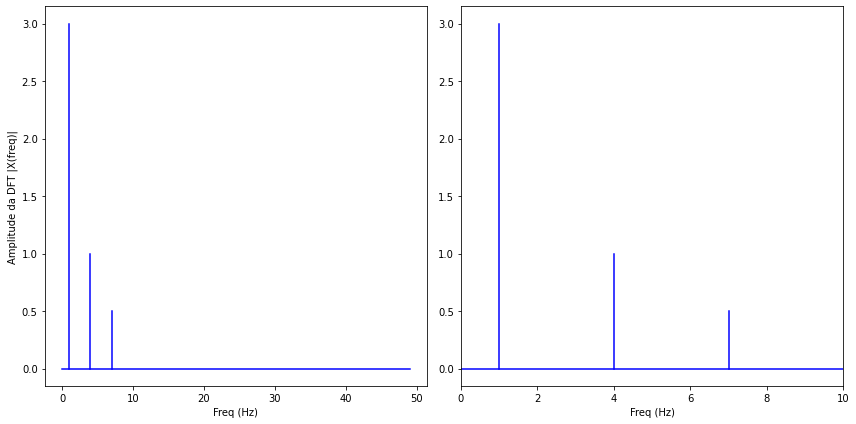

In [ ]:
n_oneside = N//2

# obtem as frequências de um lado
f_oneside = freq[:n_oneside]

# normaliza a amplitude do sinal
Y_oneside =Y[:n_oneside]/n_oneside

plt.figure(figsize = (12, 6))
plt.subplot(121)
plt.stem(f_oneside, abs(Y_oneside), linefmt='blue', markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('Amplitude da DFT |X(freq)|')

plt.subplot(122)
plt.stem(f_oneside, abs(Y_oneside), linefmt='blue', markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
# Limita o eixo x até frequência de 10 Hz
plt.xlim(0, 10)

plt.tight_layout()
plt.show()

## Limitações da DFT implementada

O principal problema com a implementação da DFT acima é que ela não é eficiente se tivermos um sinal com muitas amostras. Nesse caso, o cálculo da DFT pode levar muito tempo.

## Parte D

Escreva uma função em python que implemente o sinal indicado abaixo. 

\begin{equation}
f(t) = 3sin(2\pi f t),
\end{equation}

sendo $f=2$ Hz

In [ ]:
# 
# sr = taxa de amostragem
#
def sinal(sr):
    '''
    função para gerar um sinal 1D simples com diferentes taxas de amostragem
    '''
    ts = 1.0/sr
    t = np.arange(0,1,ts)

    freq = 2.
 
    x = 3*np.sin(2*np.pi*freq*t)

    return x

## Parte E

Escreva um simples programa em python que varia a taxa de amostragem (sr) do sinal acima de 500 e 1000, com passo de 100 e, para cada uma das taxas, determine a DFT do sinal gerado e imprima o tempo de de execução.

**OBS** Use o código abaixo como exemplo de como medir o tempo de execução

import time
start_time = time.time()
main()
print("--- %s seconds ---" % (time.time() - start_time))

In [ ]:
import time

start = 500
stop  = 1000
step  = 100

for i in range(start,stop,step):
    DFT_1D(sinal(i))
    start_time = time.time()
    print("--- %s seconds ---" % (time.time() - start_time))

--- 2.86102294921875e-06 seconds ---
--- 2.86102294921875e-06 seconds ---
--- 1.9073486328125e-06 seconds ---
--- 1.6689300537109375e-06 seconds ---
--- 2.1457672119140625e-06 seconds ---


## Parte F

Agora, utilize a função IDFt para obter e plotar o sinal original $x$ criado na "parte A" a partir do seu espetro $Y$ obtido na "parte C"

**OBS**: Observe que a IDFT codificada recebe como entrada um sinal complexo e retorna um sinal complexo. Portanto, para obter o sinal $x$ criado na "parte A", você precisa utilizar apenas a parte real do sinal de retorno. 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  del sys.path[0]


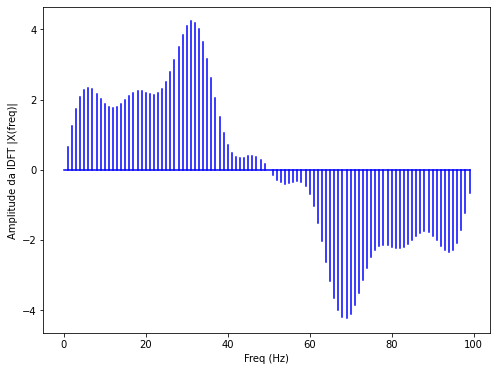

In [ ]:
# tamanho do vetor
N = len(x)

# chamada à função iDFT
X_idft = IDFT_1D(Y)

# calcula a frequência
n = np.arange(N)
T = N/sr
freq = n/T 

plt.figure(figsize = (8, 6))
plt.stem(freq, np.real(X_idft), linefmt='blue', markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('Amplitude da IDFT |X(freq)|')
plt.show()

# PROBLEMA 2

## Parte A

Estenda para sinais 2D (imagens) os códigos da DFT e IDFT implementados anteriormente para sinais 1D

**DICA**: Use do fato que a 2D-DFT pode ser escrita a partir da 1D-DFT, como indicado abaixo


\begin{equation}
F(u,v) = \frac{1}{MN} \sum_{x=0}^{N} \sum_{y=0}^{M} f(x,y) e^{-j 2\pi \left( \frac{ux}{N} + \frac{vy}{M} \right)} = \frac{1}{M} \sum_{y=0}^{M} \left[ \frac{1}{N} \sum_{x=0}^{N} e^{-j 2\pi \frac{ux}{N}} \right] e^{-j 2\pi \frac{vy}{M}} 
\end{equation}

In [ ]:
from IPython.lib.display import YouTubeVideo
#
# Função para calcular a DFT (com loops for) de um sinal de valor complexo (dtype=complex)
#
# Entrada: x -> vetor contendo as amostras (números complexos) do sinal no tempo 
# Saída: Y -> vetor contendo os coeficientes espectrais (números complexos) - (dtype=complex)
#
def DFT_2D(x):
    x = np.asarray(x)
    M, N = x.shape

    Y = np.zeros((M,N),dtype=complex)

    for k in range(M):
        for l in range(N):
            sum = 0.0
            for m in range(M):
                for n in range(N):
                    sum += x[m,n] * np.exp(complex(0,-1) * 2*np.pi * ((k * m) / M + (l * n) / N))
            Y[k,l] = sum
    return Y

In [ ]:
#
# Função para calcular a IDFT (com loops for) de um sinal de valor complexo (dtype=complex)
#
# Entrada: Y -> vetor contendo os coeficientes espectrais (números complexos) 
# Saída: x -> vetor contendo as amostras (números complexos) do sinal no tempo 
#
def IDFT_2D(Y):
    Y = np.asarray(Y)
    M, N = Y.shape

    x = np.zeros((M,N),dtype=complex)

    for k in range(M):
        for l in range(N):
            sum = 0.0
            for m in range(M):
                for n in range(N):
                    sum += Y[m,n] * np.exp(complex(0,1) * 2*np.pi * ((k * m) / M + (l * n) / N))
            Y[k,l] = sum  
    
    return x    

## Parte B

Escreva um código simples que leia a imagem fornecida para essa prática, calcule a sua DFT e plote o espectro de Fourier. 

**OBS**: Use a função do opencv para a leitura e visualização da imagem e do seu espetro.

**DICA de USO - Leitura e Escrita de uma imagem**

im_gray = cv2.imread('Nome_da_Imagem', cv2.IMREAD_GRAYSCALE)

cv2.imwrite('Nome_da_Imagem', im_gray)

Text(0.5, 1.0, 'Magnitude Spectrum')

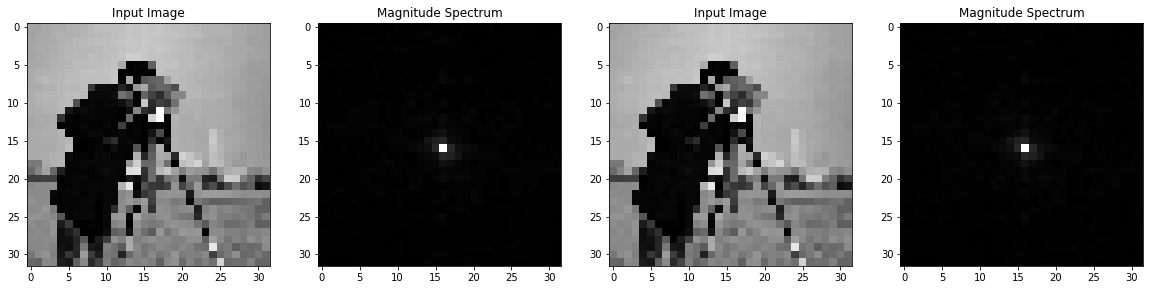

In [ ]:
import cv2
import matplotlib.pyplot as plt

# Leitura de imagem
img = cv2.imread('cameraman.tiff', cv2.IMREAD_GRAYSCALE)
_img = cv2.resize(img, (32,32))

img_Y = np.fft.fft2(_img)
img_Y_shift = np.fft.fftshift(img_Y)
_img_Y = DFT_2D(_img)
_img_Y_shift = np.fft.fftshift(_img_Y)

plt.figure(figsize = (20, 20))

plt.subplot(141),plt.imshow(_img, cmap = 'gray')
plt.title('Input Image')
plt.subplot(142),plt.imshow(np.abs(img_Y_shift), cmap = 'gray')
plt.title('Magnitude Spectrum')

plt.subplot(143),plt.imshow(_img, cmap = 'gray')
plt.title('Input Image')
plt.subplot(144),plt.imshow(np.abs(_img_Y_shift), cmap = 'gray')
plt.title('Magnitude Spectrum')